<a href="https://colab.research.google.com/github/adityakalkeri1/Projects/blob/main/Ratings_project/Reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
import re
import string
import random


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Ratings Project/Full_comments_dataset.csv')

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def text_clean(row):
    row = re.sub('\n', ' ', row)                                                             #For removing \n in the comments
    row = re.sub('@[A-Za-z0-9]', '', row)                                                    #For removing any usernames
    row = re.sub("""[!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]""", ' ', row)                         #For removing punctuations
    row = row.split()                                                                       #For removing the stopwords
    row = [word for word in row if word not in stop_words]
    row = (' ').join(row)                                                             
    return row
df['Comment'] = df['Comment'].apply(text_clean)

In [ ]:
#Finding top 20 words in each class
words_1 = pd.Series(' '.join(df[df['Rating'] == 1]['Comment']).split()).value_counts()[:20]
words_1

I          10959
phone       5481
product     5087
quality     3635
buy         3519
TV          3061
good        2937
bad         2588
Amazon      2543
mobile      2299
camera      2244
The         2212
service     2080
working     2060
time        2000
money       1947
like        1925
It          1836
days        1824
2           1824
dtype: int64

In [ ]:
words_2 = pd.Series(' '.join(df[df['Rating'] == 2]['Comment']).split()).value_counts()[:20]
words_2

I          10753
phone       7785
good        6755
quality     5765
camera      3735
The         3048
battery     2909
TV          2835
product     2732
2           2587
like        2434
buy         2423
It          2410
mobile      2281
time        2240
one         2142
also        2076
Samsung     2070
screen      2069
bad         1946
dtype: int64

In [ ]:
words_3 = pd.Series(' '.join(df[df['Rating'] == 3]['Comment']).split()).value_counts()[:20]
words_3

I          10339
good        9306
phone       6248
quality     5833
camera      3935
2           3204
battery     3103
TV          3097
The         2982
3           2913
1           2640
like        2570
price       2404
5           2344
time        2244
product     2235
It          2182
also        2149
better      2079
use         2031
dtype: int64

In [ ]:
words_4 = pd.Series(' '.join(df[df['Rating'] == 4]['Comment']).split()).value_counts()[:20]
words_4

good       11348
I           8826
quality     5923
phone       4794
price       3703
TV          3493
The         3441
product     3433
Good        3046
camera      2813
2           2570
5           2441
battery     2367
sound       2358
It          2341
3           2242
1           2234
tv          2130
one         2061
also        2037
dtype: int64

In [ ]:
words_5 = pd.Series(' '.join(df[df['Rating'] == 5]['Comment']).split()).value_counts()[:20]
words_5

I          7091
good       6897
quality    4186
product    3717
phone      3187
price      2847
TV         2843
The        2340
Good       2254
camera     1914
best       1751
sound      1707
It         1685
tv         1656
money      1582
also       1569
battery    1509
2          1411
nice       1411
picture    1408
dtype: int64

In [ ]:
#we will be removing words like 'i', 'samsung', 'amazon', 'flipkart', 'the', 'The'
remove_words = ['I', 'The', 'Amazon','Flipkart', 'It', 'mobiles', 'TV', 'DSLR', 'Smartwatch', 'Laptop']
def words_to_be_removed(row):
  row = row.split()                                                                       #For removing the stopwords
  row = [word for word in row if word not in remove_words]
  row = (' ').join(row)
  return row
df['Comment'] = df['Comment'].apply(words_to_be_removed)

In [ ]:
from nltk.stem.porter import PorterStemmer
porter =PorterStemmer()
def stem_words(row):
    row = [porter.stem(word) for word in row]
    row = ('').join(row)
    return row
df['Comment'] = df['Comment'].apply(stem_words)

In [ ]:
#Vectorizing the data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 5, ngram_range = (1,3)).fit(df['Comment'])

vocab = vectorizer.get_feature_names()
print('vocab size = ', len(vocab))

vocab size =  226730


In [ ]:
features = np.array(vocab)
for i in range(1,6):
  comments = vectorizer.transform(df[df['Rating']==i]['Comment'])
  importance = np.argsort(np.asarray(comments.sum(axis=0)).ravel())[::-1]
  print('Top TFIDF scored words for Ratings {} = '.format(i), features[importance][:20])

Top TFIDF scored words for Ratings 1 =  ['bad' 'product' 'worst' 'phone' 'buy' 'waste' 'quality' 'working' 'poor'
 'not' 'money' 'mobile' 'very' 'good' 'camera' 'waste money' 'slow'
 'service' 'don' 'problem']
Top TFIDF scored words for Ratings 2 =  ['phone' 'good' 'quality' 'camera' 'not' 'bad' 'battery' 'product' 'slow'
 'buy' 'mobile' 'poor' 'ok' 'average' 'screen' 'working' 'worst' 'display'
 'picture' 'samsung']
Top TFIDF scored words for Ratings 3 =  ['good' 'ok' 'quality' 'nice' 'camera' 'phone' 'battery' 'product'
 'average' 'not' 'sound' 'like' 'price' 'bad' 'display' 'good product'
 'picture' 'tv' 'poor' 'mobile']
Top TFIDF scored words for Ratings 4 =  ['good' 'nice' 'product' 'good product' 'quality' 'price' 'phone' 'best'
 'camera' 'sound' 'ok' 'super' 'money' 'battery' 'value' 'picture'
 'nice product' 'value money' 'tv' 'awesome']
Top TFIDF scored words for Ratings 5 =  ['good' 'nice' 'product' 'best' 'awesome' 'excellent' 'good product'
 'very' 'quality' 'super' 'phone'

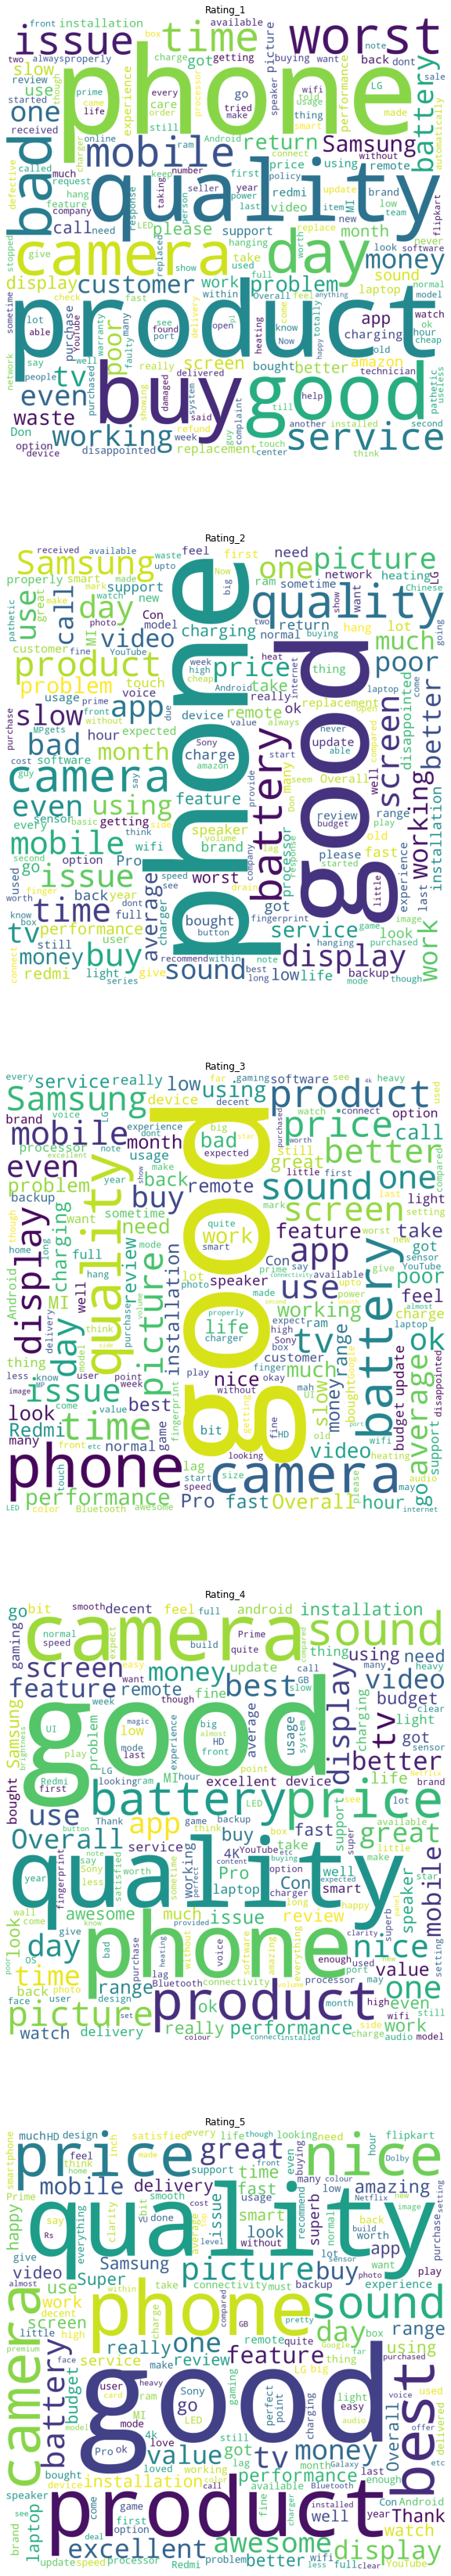

In [ ]:
plt.figure(figsize = (20,60))
text = df[df['Rating'] == 1]['Comment'].values
cloud = WordCloud(stopwords=STOPWORDS, collocations=False,height = 1500, width = 1500, background_color = 'white').generate(" ".join(text))
plt.subplot(5,1, 1)
plt.axis('off')
plt.imshow(cloud)
plt.title('Rating_1');

text = df[df['Rating'] == 2]['Comment'].values
cloud = WordCloud(stopwords=STOPWORDS, collocations=False,height = 1500, width = 1500, background_color = 'white').generate(" ".join(text))
plt.subplot(5,1, 2)
plt.axis('off')
plt.imshow(cloud)
plt.title('Rating_2');

text = df[df['Rating'] == 3]['Comment'].values
cloud = WordCloud(stopwords=STOPWORDS, collocations=False,height = 1500, width = 1500, background_color = 'white').generate(" ".join(text))
plt.subplot(5,1, 3)
plt.axis('off')
plt.imshow(cloud)
plt.title('Rating_3');

text = df[df['Rating'] == 4]['Comment'].values
cloud = WordCloud(stopwords=STOPWORDS, collocations=False,height = 1500, width = 1500, background_color = 'white').generate(" ".join(text))
plt.subplot(5,1, 4)
plt.axis('off')
plt.imshow(cloud)
plt.title('Rating_4');

text = df[df['Rating'] == 5]['Comment'].values
cloud = WordCloud(stopwords=STOPWORDS, collocations=False,height = 1500, width = 1500, background_color = 'white').generate(" ".join(text))
plt.subplot(5,1, 5)
plt.axis('off')
plt.imshow(cloud)
plt.title('Rating_5');

good appears in most of the ratings

In [ ]:
#Now we will shuffle the dataset
data_input = [[x,y] for x,y in zip(df['Comment'], df['Rating'])]

random.shuffle(data_input)

text = [x[0] for x in data_input]
labels = [x[1] for x in data_input]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state = 10)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df = 5, ngram_range = (1,3)).fit(X_train)

vocab = vect.get_feature_names()

print('Length of vocab: ', len(vocab))

Length of vocab:  166318


In [ ]:
X_train_vectorised = vect.transform(X_train)
X_test_vectorised = vect.transform(X_test)

In [ ]:
#Now training and evaluating Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb_model = MultinomialNB(alpha= 0.1).fit(X_train_vectorised, y_train)
train_pred = nb_model.predict(X_train_vectorised)
test_pred = nb_model.predict(X_test_vectorised)

print('Training accuracy: ', accuracy_score(y_train,train_pred))
print()
print('Testing accuracy: ', accuracy_score(y_test,test_pred))

Training accuracy:  0.8190678716994506

Testing accuracy:  0.7556748710860667


In [ ]:
#Now training and testing logistic regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter = 1000).fit(X_train_vectorised, y_train)
train_pred = lr_model.predict(X_train_vectorised)
test_pred = lr_model.predict(X_test_vectorised)

print('Training accuracy: ', accuracy_score(y_train,train_pred))
print()
print('Testing accuracy: ', accuracy_score(y_test,test_pred))

Training accuracy:  0.9249335459861776

Testing accuracy:  0.8717239912816969


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth = 70).fit(X_train_vectorised, y_train)
train_pred = rf_model.predict(X_train_vectorised)
test_pred = rf_model.predict(X_test_vectorised)

print('Training accuracy: ', accuracy_score(y_train,train_pred))
print()
print('Testing accuracy: ', accuracy_score(y_test,test_pred))

Training accuracy:  0.8230373914584441

Testing accuracy:  0.7741215246398384


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect =  TfidfVectorizer(min_df = 5, ngram_range = (1,3)).fit(X_train)

vocab = vect.get_feature_names()

print('Length of vocab: ', len(vocab))

Length of vocab:  166318


In [ ]:
X_train_vectorised = vect.transform(X_train)
X_test_vectorised = vect.transform(X_test)

In [ ]:
#Now training and evaluating Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb_model = MultinomialNB(alpha= 0.1).fit(X_train_vectorised, y_train)
train_pred = nb_model.predict(X_train_vectorised)
test_pred = nb_model.predict(X_test_vectorised)

print('Training accuracy: ', accuracy_score(y_train,train_pred))
print()
print('Testing accuracy: ', accuracy_score(y_test,test_pred))

Training accuracy:  0.8742867269183059

Testing accuracy:  0.81048322789857


In [ ]:
#Now training and testing logistic regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter = 1000).fit(X_train_vectorised, y_train)
train_pred = lr_model.predict(X_train_vectorised)
test_pred = lr_model.predict(X_test_vectorised)

print('Training accuracy: ', accuracy_score(y_train,train_pred))
print()
print('Testing accuracy: ', accuracy_score(y_test,test_pred))

Training accuracy:  0.8889420520999468

Testing accuracy:  0.8297804476104407


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth = 70).fit(X_train_vectorised, y_train)
train_pred = rf_model.predict(X_train_vectorised)
test_pred = rf_model.predict(X_test_vectorised)

print('Training accuracy: ', accuracy_score(y_train,train_pred))
print()
print('Testing accuracy: ', accuracy_score(y_test,test_pred))

Training accuracy:  0.8626971469076732

Testing accuracy:  0.8120248790601244


In [ ]:
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

gs = GridSearchCV(estimator =LogisticRegression(), param_grid= param_grid, scoring = 'accuracy', cv = 5)
gs.fit(X_train_vectorised, y_train)
gs.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8626971469076732

In [ ]:
model = gs.best_estimator_
train_pred = model.predict(X_train_vectorised)
test_pred = model.predict(X_test_vectorised)

print('Training accuracy: ', accuracy_score(y_train,train_pred))
print()
print('Testing accuracy: ', accuracy_score(y_test,test_pred))

Training accuracy:  0.9350345560871877

Testing accuracy:  0.8804422944022114
